# Bike Sharing Assignent

### About the Company

BoomBikes is a US bike-sharing provider. A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system services company headquartered in San Francisco, California. That explains the business model.

#### Problem statement

BoomBikes is has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 
Company want to understand the factors affecting the demand for these shared bikes in the American market. 
Mainly the company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

#### input :

- day.csv file which contains the previous bikesharing data set
- Readme.txt which contains the meta data information of day.csv file

In [1]:
# importing python libraries required for the analysis
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msgno # for analysing missing values
import numpy as np
import seaborn as sb #for visualization
from sklearn.model_selection import train_test_split # for splitting train & test data sets
from sklearn.preprocessing import MinMaxScaler # for scaling the required variables in data set
from sklearn.linear_model import LinearRegression # linear model building
from sklearn.feature_selection import RFE # importing for Recursive Feature Elimination
from statsmodels.stats.outliers_influence import variance_inflation_factor #for VIF calculation
import statsmodels.api as sm #for model building
from sklearn.metrics import r2_score

Read the input day.csv file. This file is assumed to be in  the same folder as of the code
Also, have a quick bird eye view of the contents of the file

In [2]:
#FILE READ

#read the loan file using pandas library
bkData = pd.read_csv('./day.csv')
#Quick look at the header
bkData.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
#Analyse the data set
print(bkData.shape)
bkData.describe()

(730, 16)


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


<AxesSubplot: >

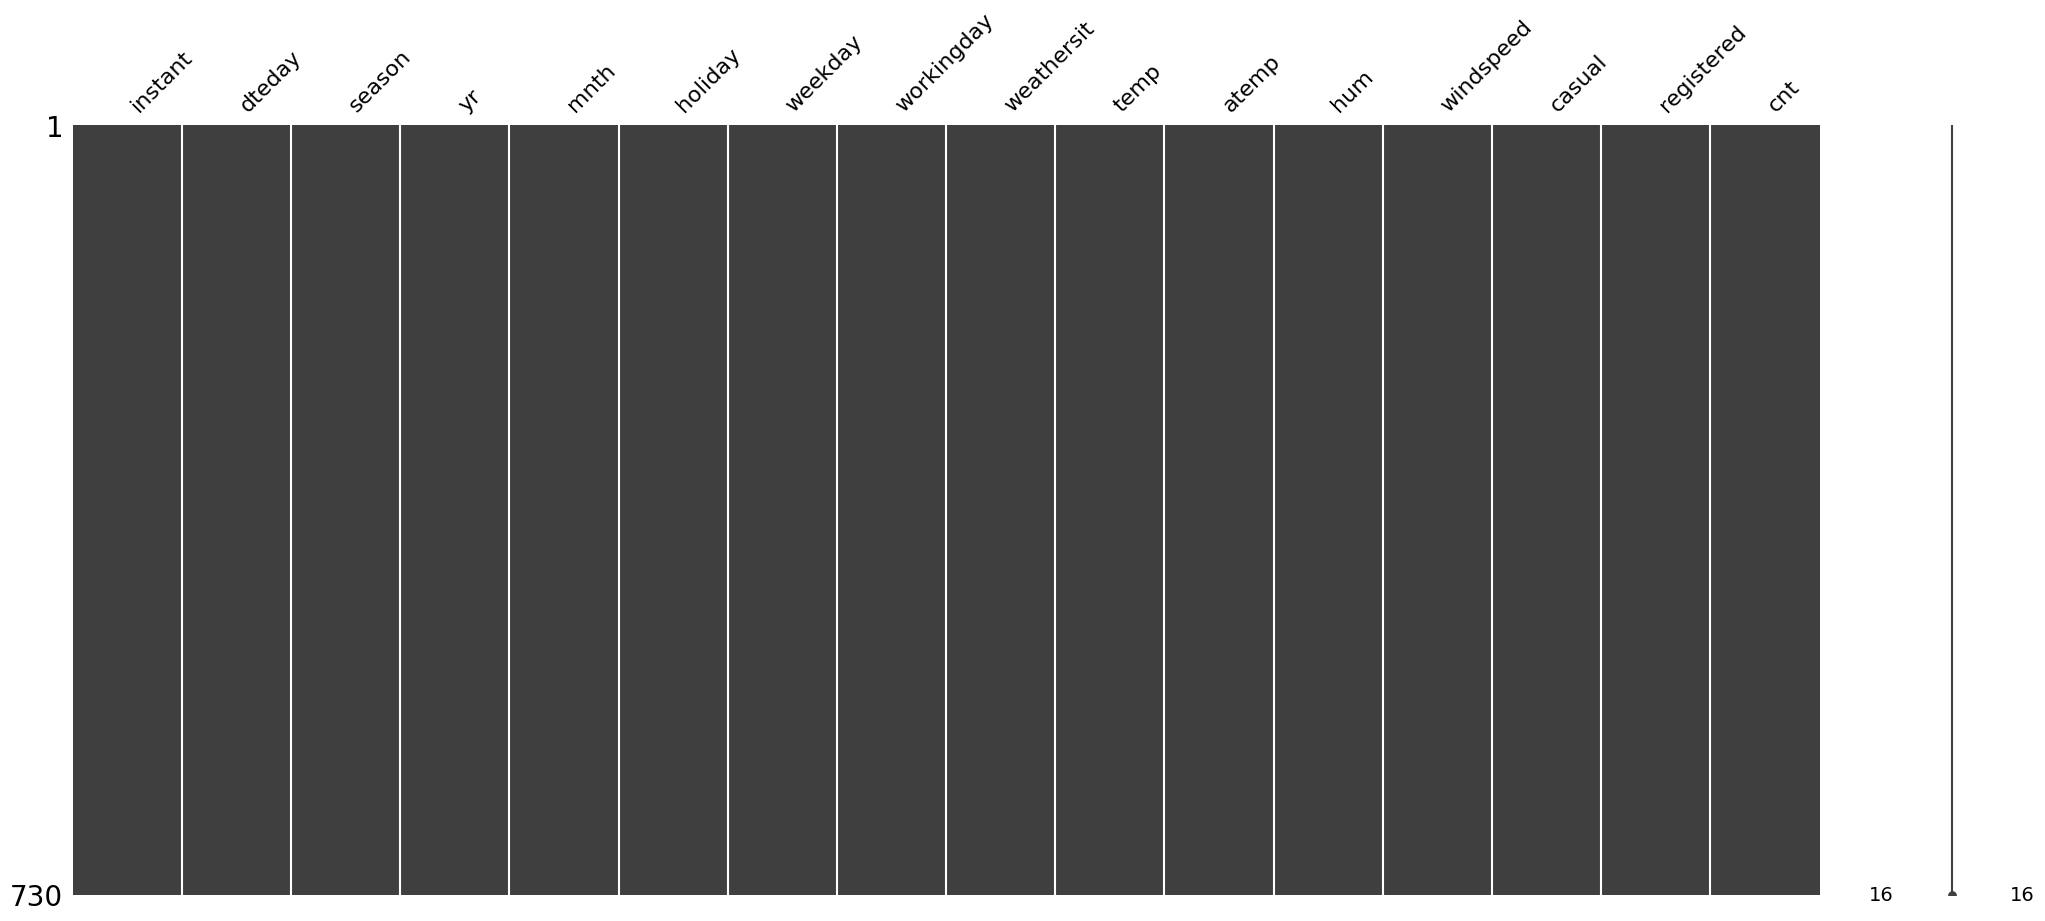

In [4]:
#cgeck any columns having missing values
bkData.isnull().sum()
#visualize the missing values in columns
msgno.matrix(bkData) 

From the above figure its clear that there are no missing values

Next step is Data preparation. Here we will analyze different column values and do changes as required.

As per the metadata information 
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- Months : 1 to 12 representing months Jan to Dec
- weekday : represnting day of the week (Sunday through Saturday)
- weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [5]:
#validate the info given in the metadata file and make sure the values are correct
print(bkData['season'].value_counts())
print(bkData['yr'].value_counts())
print(bkData['mnth'].value_counts())
print(bkData['holiday'].value_counts())
print(bkData['weekday'].value_counts())
print(bkData['workingday'].value_counts())
print(bkData['weathersit'].value_counts())

3    188
2    184
1    180
4    178
Name: season, dtype: int64
0    365
1    365
Name: yr, dtype: int64
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64
0    709
1     21
Name: holiday, dtype: int64
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64
1    499
0    231
Name: workingday, dtype: int64
1    463
2    246
3     21
Name: weathersit, dtype: int64


From the above data its verified that the values in the csv files are all as per the metadata and hence no further cleanup or changes required. 
Now lets replace this integer values with text so that we can later convert to individual variables for analysis

In [6]:
#replace as per the data from metadata file
bkData.season.replace({1:"Spring", 2:"Summer", 3:"Fall", 4:"Winter"},inplace = True)
bkData.mnth.replace({1: 'Jan',2: 'Feb',3: 'Mar',4: 'Apr',5: 'May',6: 'Jun',7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'}, inplace = True)
bkData.weekday.replace({0: 'Sun',1: 'Mon',2: 'Tue',3: 'Wed',4: 'Thu',5: 'Fri',6: 'Sat'}, inplace = True)
bkData.weathersit.replace({1:'Clear',2:'Misty',3:'LightShower',4:'HeavyShower'},inplace = True)
bkData.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,Jan,0,Sat,0,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,Jan,0,Sun,0,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
bkData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(7), object(5)
memory usage: 91.4+ KB


### Data Analysis

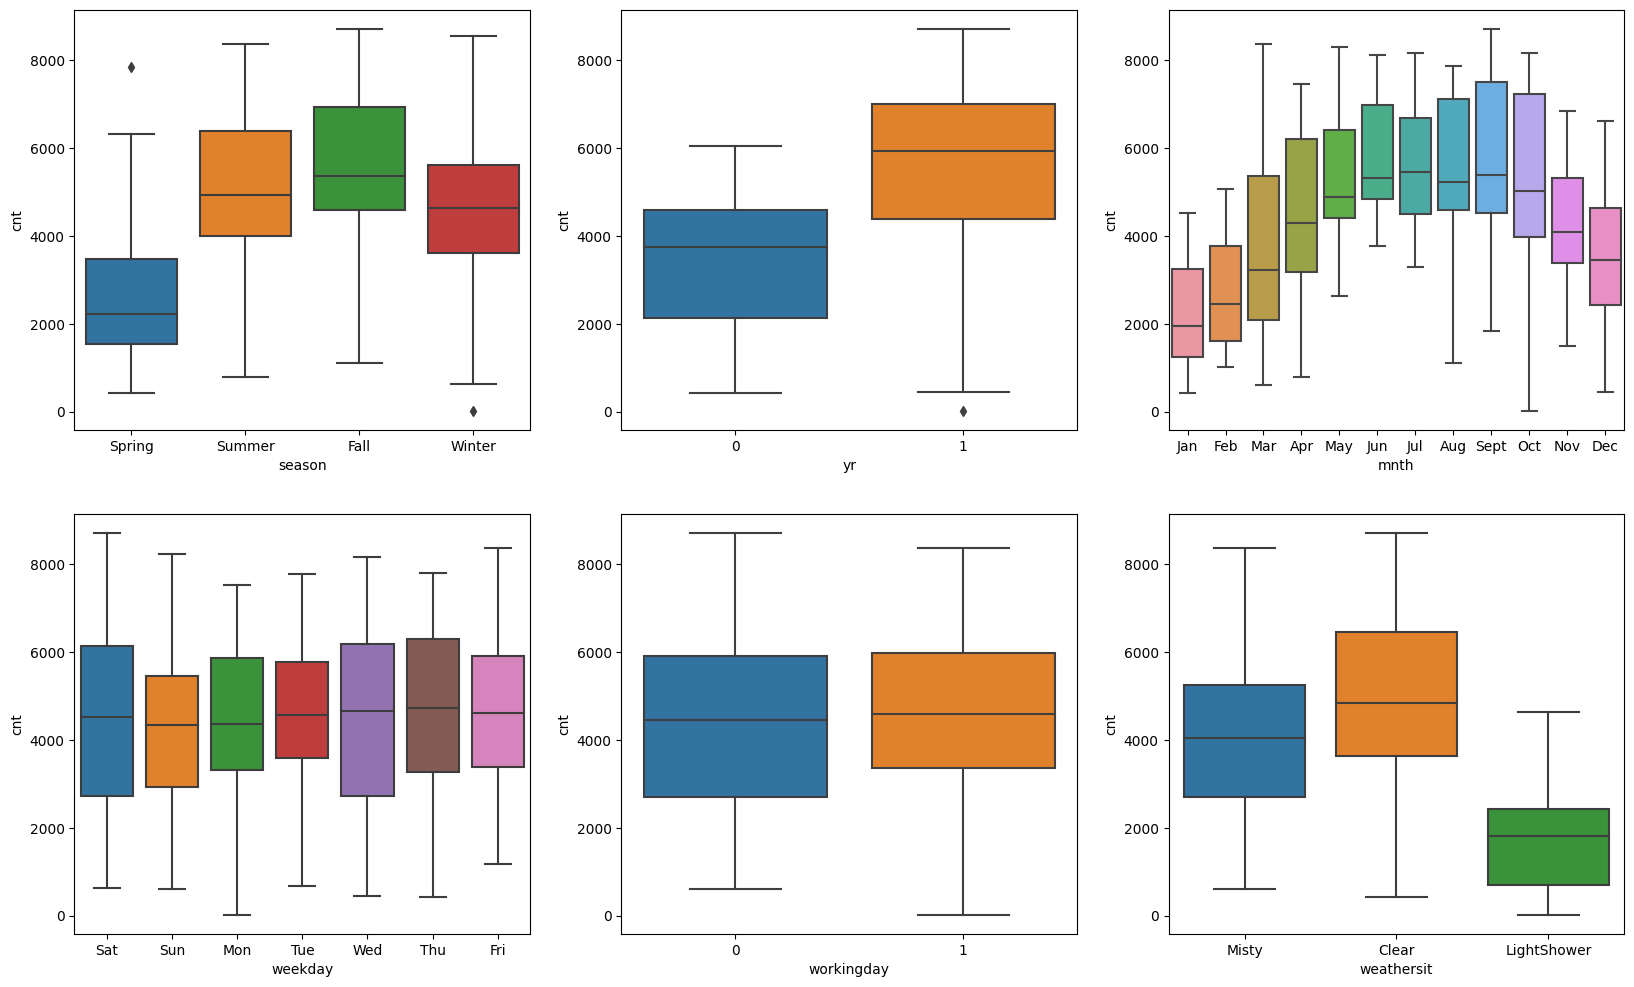

In [8]:
#Lets visualize the categorical variables against the target variable 'cnt' and see the impact.
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sb.boxplot(x='season',y='cnt',data=bkData)
plt.subplot(2,3,2)
sb.boxplot(x='yr',y='cnt',data=bkData)
plt.subplot(2,3,3)
sb.boxplot(x='mnth',y='cnt',data=bkData)
plt.subplot(2,3,4)
sb.boxplot(x='weekday',y='cnt',data=bkData)
plt.subplot(2,3,5)
sb.boxplot(x='workingday',y='cnt',data=bkData)
plt.subplot(2,3,6)
sb.boxplot(x='weathersit',y='cnt',data=bkData)
plt.show()

Observations from above box plots
- Fall has the heighest demand followed by Summer and then winter.
- There was higher demand for the bikes in 2019 comapred ot 2018
- Demand is high during the mid of the year.
- Trend looks same across all week days & looks like not much impact on holidays
- More demand if the weather is Clear or slightly misty.

<Figure size 1500x2000 with 0 Axes>

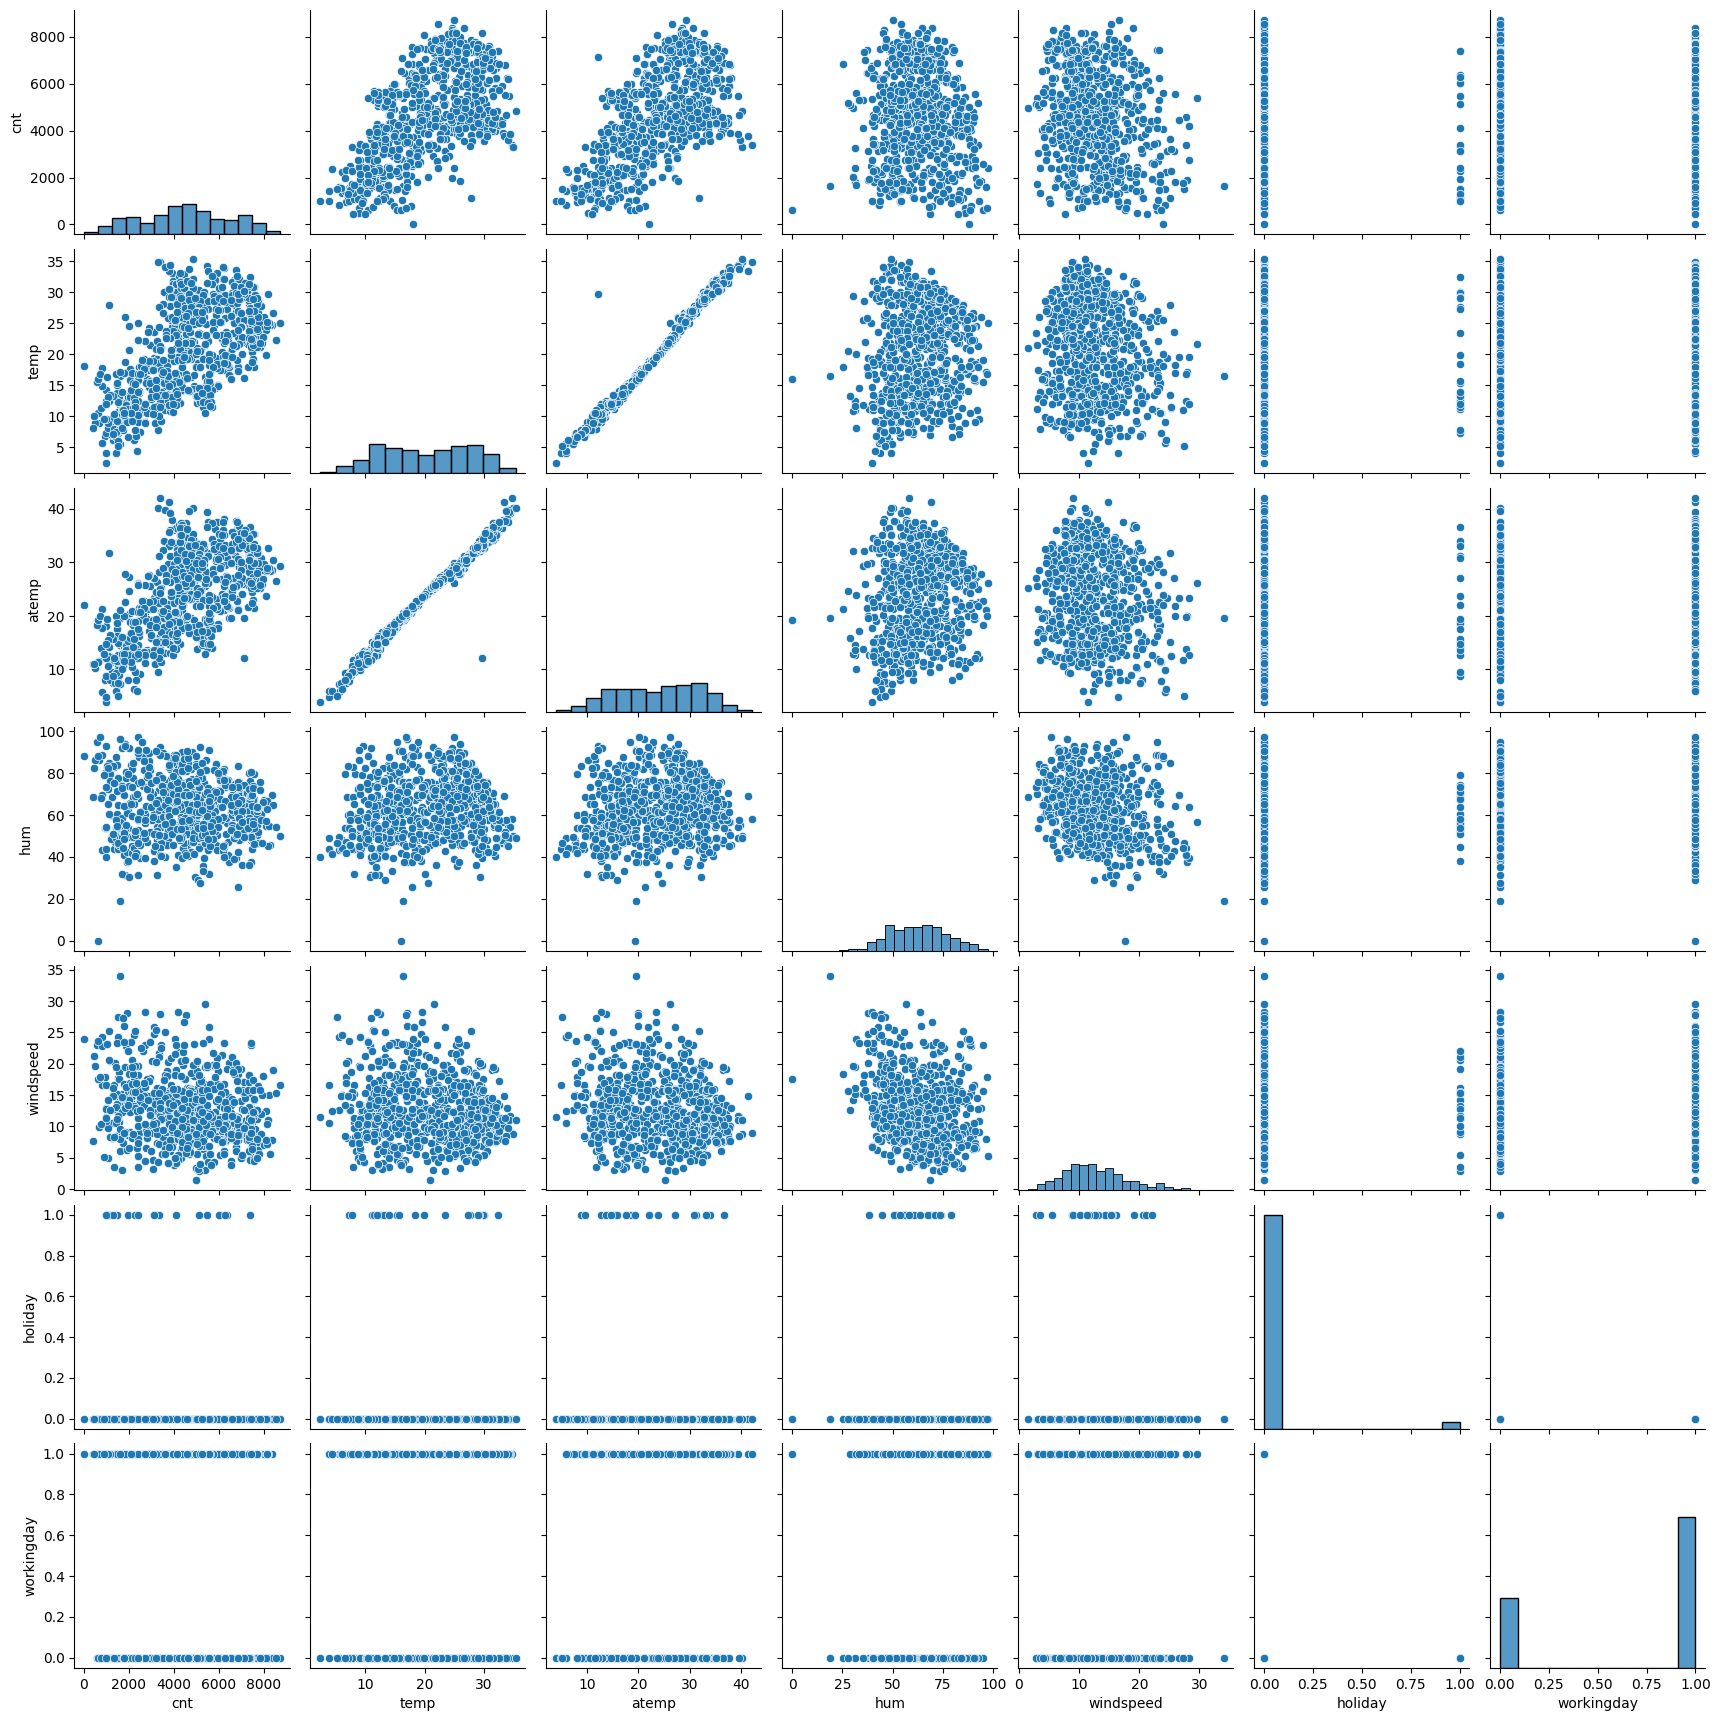

In [9]:
#Now lets try to visualize the numeric data we have
plt.figure(figsize = (15,20))
sb.pairplot(data=bkData,vars=['cnt', 'temp', 'atemp', 'hum','windspeed', 'holiday', 'workingday'])
plt.show()

from the plot above we can see that there is a linear correlation with temp(actual temperature) & atemp(feeling temperature).

Also, the cnt also has some kind of linear relation with temp & atemp(though not very much visible; but can see a slight formation in that trend). Also, the working day & holiday has a flat/no increase with target variable cnt.

In [10]:
#create columns as per the categorical variables so that we can use them for further linear regression analysis. Also keep it to N-1
bkData = pd.get_dummies(data=bkData,columns=["season","mnth","weekday","weathersit"],drop_first=True)
#bkData = pd.get_dummies(data=bkData,columns=["weathersit"]) #noticed that one of the criteria doesn't have data as mentioned in metadata

In [11]:
bkData.head()

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_LightShower,weathersit_Misty
0,1,01-01-2018,0,0,0,14.110847,18.18125,80.5833,10.749882,331,...,0,0,0,1,0,0,0,0,0,1
1,2,02-01-2018,0,0,0,14.902598,17.68695,69.6087,16.652113,131,...,0,0,0,0,1,0,0,0,0,1
2,3,03-01-2018,0,0,1,8.050924,9.47025,43.7273,16.636703,120,...,0,0,1,0,0,0,0,0,0,0
3,4,04-01-2018,0,0,1,8.200000,10.60610,59.0435,10.739832,108,...,0,0,0,0,0,0,1,0,0,0
4,5,05-01-2018,0,0,1,9.305237,11.46350,43.6957,12.522300,82,...,0,0,0,0,0,0,0,1,0,0


In [12]:
bkData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   instant                 730 non-null    int64  
 1   dteday                  730 non-null    object 
 2   yr                      730 non-null    int64  
 3   holiday                 730 non-null    int64  
 4   workingday              730 non-null    int64  
 5   temp                    730 non-null    float64
 6   atemp                   730 non-null    float64
 7   hum                     730 non-null    float64
 8   windspeed               730 non-null    float64
 9   casual                  730 non-null    int64  
 10  registered              730 non-null    int64  
 11  cnt                     730 non-null    int64  
 12  season_Spring           730 non-null    uint8  
 13  season_Summer           730 non-null    uint8  
 14  season_Winter           730 non-null    ui

###### Drop unwanted columns. 
These columns are either unwanted from base data set or we have deduced someother columns from it and hence not required anymore. 
instant is index column, 
cnt is the target variable and casual & registered are its split
dteday is the date, but we already have year, month and weekdays info available as separate columns


In [13]:
#drop unwanted columns. These columns are either unwanted from base data set 
#or we have deduced someother columns from it and hence not required anymore

bkData.drop({'instant', 'casual', 'registered', 'dteday'},axis=1,inplace=True)
bkData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   yr                      730 non-null    int64  
 1   holiday                 730 non-null    int64  
 2   workingday              730 non-null    int64  
 3   temp                    730 non-null    float64
 4   atemp                   730 non-null    float64
 5   hum                     730 non-null    float64
 6   windspeed               730 non-null    float64
 7   cnt                     730 non-null    int64  
 8   season_Spring           730 non-null    uint8  
 9   season_Summer           730 non-null    uint8  
 10  season_Winter           730 non-null    uint8  
 11  mnth_Aug                730 non-null    uint8  
 12  mnth_Dec                730 non-null    uint8  
 13  mnth_Feb                730 non-null    uint8  
 14  mnth_Jan                730 non-null    ui

In [14]:
bkData.corr()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_LightShower,weathersit_Misty
yr,1.000000e+00,0.008195,-0.002945,0.048789,0.047215,-0.112547,-0.011624,0.569728,3.225068e-16,-1.751358e-17,...,8.571788e-17,-2.138778e-17,0.003904,-0.003904,0.003904,-1.086706e-16,-1.950413e-16,-0.003935,-0.073758,-0.005796
holiday,8.195345e-03,1.000000,-0.252948,-0.028764,-0.032703,-0.015662,0.006257,-0.068764,3.464187e-02,-2.440810e-02,...,6.362682e-03,8.174933e-03,0.279764,-0.070541,-0.070541,-2.325423e-02,-4.670117e-02,-0.046213,-0.029619,-0.018668
workingday,-2.945396e-03,-0.252948,1.000000,0.053470,0.052940,0.023202,-0.018666,0.062542,-2.761520e-02,1.509123e-02,...,-4.023504e-03,-1.087082e-02,0.152976,-0.602419,-0.602419,2.604690e-01,2.688958e-01,0.267305,0.028990,0.048877
temp,4.878919e-02,-0.028764,0.053470,1.000000,0.991696,0.128565,-0.158186,0.627044,-6.194080e-01,1.548756e-01,...,-1.761584e-02,1.977294e-01,-0.004799,-0.030363,-0.026802,1.949216e-02,1.935952e-02,0.023459,-0.058461,-0.096297
atemp,4.721519e-02,-0.032703,0.052940,0.991696,1.000000,0.141512,-0.183876,0.630685,-6.247724e-01,1.631513e-01,...,-4.775183e-03,1.924774e-01,0.000091,-0.031340,-0.023247,2.045265e-02,2.204543e-02,0.020842,-0.064937,-0.092933
hum,-1.125471e-01,-0.015662,0.023202,0.128565,0.141512,1.000000,-0.248506,-0.098543,-1.848840e-01,-2.870035e-03,...,1.415566e-01,1.831181e-01,0.028591,-0.023310,0.000020,-5.200348e-02,4.061570e-02,0.046059,0.267592,0.490628
windspeed,-1.162435e-02,0.006257,-0.018666,-0.158186,-0.183876,-0.248506,1.000000,-0.235132,1.788801e-01,9.742067e-02,...,-6.013274e-02,-9.482530e-02,0.000999,0.032187,-0.010429,5.792278e-03,6.961095e-03,-0.014025,0.117332,-0.037177
cnt,5.697285e-01,-0.068764,0.062542,0.627044,0.630685,-0.098543,-0.235132,1.000000,-5.617018e-01,1.453245e-01,...,1.088461e-01,1.946635e-01,-0.035991,0.009012,-0.059146,3.355106e-02,5.596898e-04,0.014012,-0.240602,-0.170686
season_Spring,3.225068e-16,0.034642,-0.027615,-0.619408,-0.624772,-0.184884,0.178880,-0.561702,1.000000e+00,-3.320989e-01,...,-1.742860e-01,-1.711958e-01,0.000993,0.010049,0.010049,-5.854320e-03,-5.854320e-03,-0.012756,-0.022400,0.029198
season_Summer,-1.751358e-17,-0.024408,0.015091,0.154876,0.163151,-0.002870,0.097421,0.145325,-3.320989e-01,1.000000e+00,...,-1.768562e-01,-1.737204e-01,0.004803,-0.004187,-0.004187,-1.928926e-03,-1.928926e-03,0.009410,-0.043283,0.040011


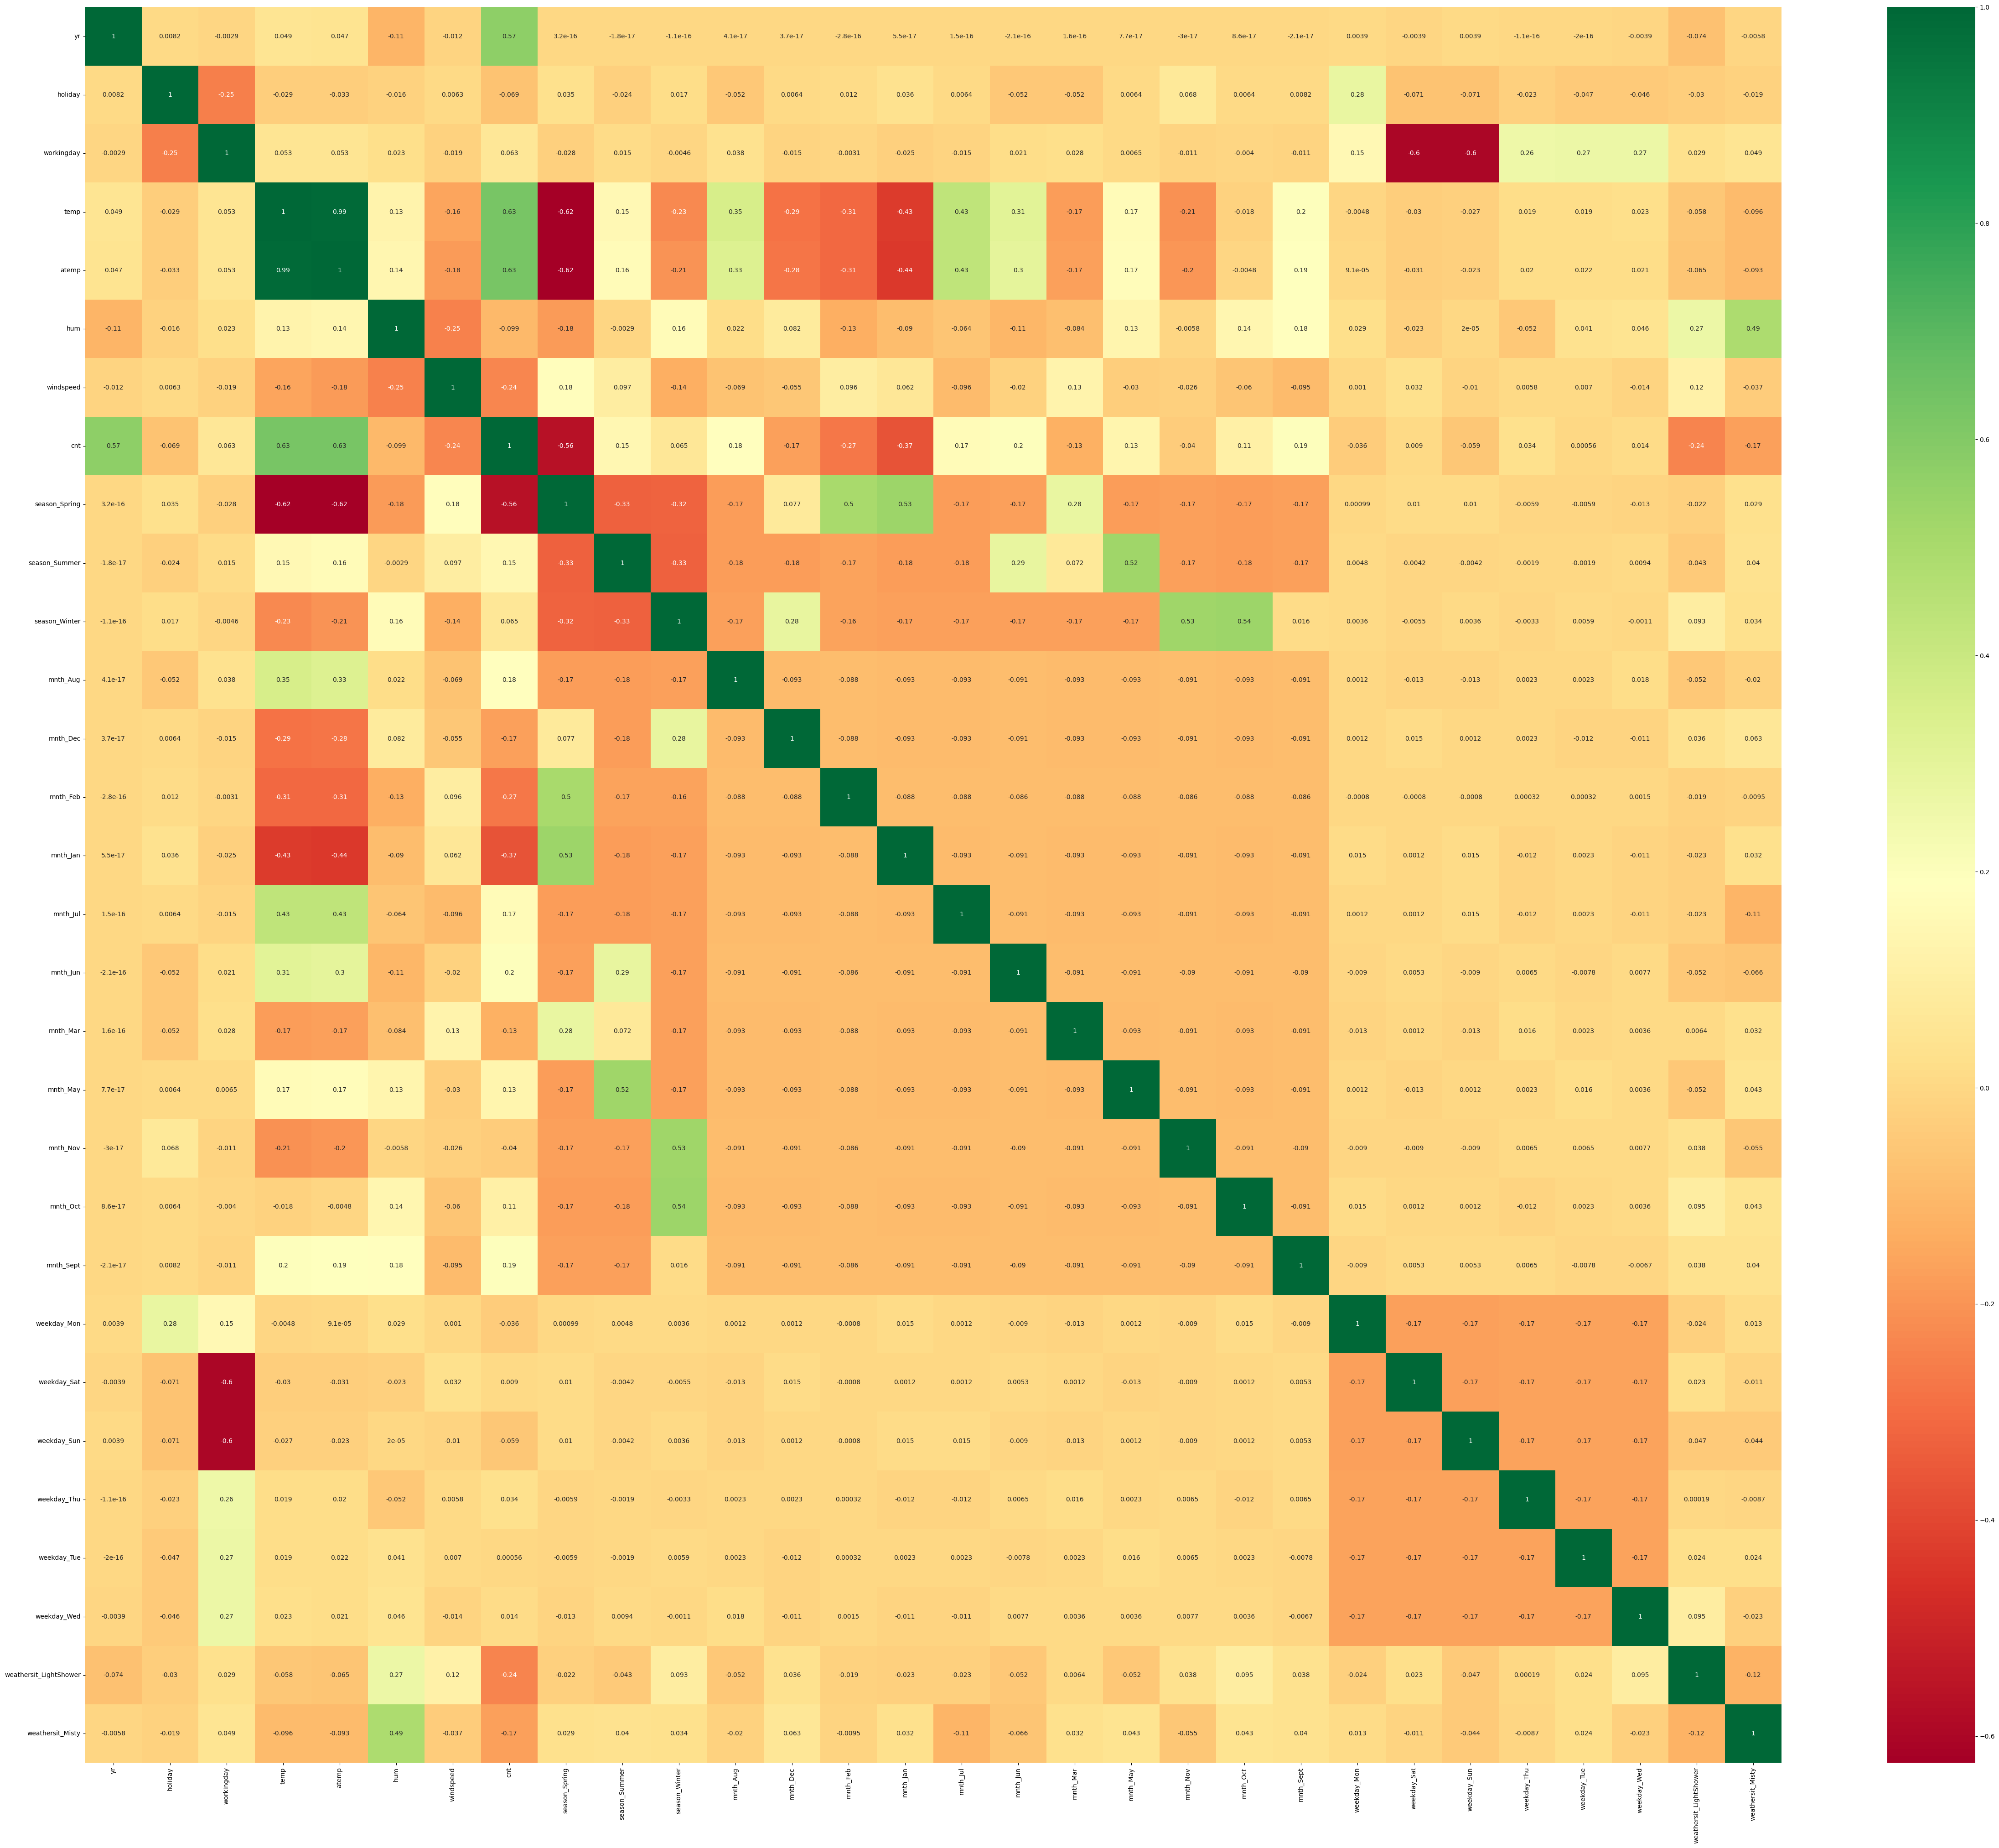

In [15]:
plt.figure(figsize=(60,50))
sb.heatmap(bkData.corr(),cmap="RdYlGn",annot=True)
plt.show()

From the above heat chart, 
- cnt has correlation with yr, temp and atemp.
- Weather winter has correlation with Months Oct & Nov and Summer with May, Spring with Jan & Feb.
- Working day has negative correlation with Saturday & Sunday
- Humidity has strong correlation to misty weather

### Create train and test data sets
Now dataset is cleansed, enriched with new columns and have done basic analysis to find the correlations. Its time now to split the dataset to train data set and test data set.

In [16]:
#Split train & test data set in the 70:30 ratio
np.random.seed(0)
bk_train, bk_test = train_test_split(bkData, train_size = 0.7, random_state = 100)

In [17]:
#verify the train & test data sets
print(bkData.shape)
print(bk_train.shape)
print(bk_test.shape)

(730, 30)
(510, 30)
(220, 30)


In [18]:
#inspect the train data set
bk_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_LightShower,weathersit_Misty
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,1,...,0,0,0,0,0,0,0,0,0,1


### Rescaling the variables
Its clear from the above data, that temp, atemp, hum, windspeed column values are in a different scale. Its important to bring all the variables to a similar scale for linear regression & model.

In [19]:
#Its clear from the above data, that temp, atemp, hum, windspeed column values are in a different scale
sc_vars = ['temp','atemp','hum','windspeed', 'cnt']
scaler = MinMaxScaler()

#Fit and transform the training data set
bk_train[sc_vars] = scaler.fit_transform(bk_train[sc_vars])

Now inspect the data after scaling

In [20]:
bk_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_LightShower,weathersit_Misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
bk_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_LightShower,weathersit_Misty
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,0,0,0,1


### Building the model using RFE

In [22]:
#Building the model using RFE - Recursive feature elimination. Adding & Removal model is time consuming, hence using RFE
y_train = bk_train.pop('cnt')
X_train = bk_train

lreg = LinearRegression()
lreg.fit(X_train, y_train)

LinearRegression()

In [23]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [24]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_LightShower,weathersit_Misty
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [25]:
rfe = RFE(lreg,n_features_to_select= 15) #limit the number of features to 15
rfe = rfe.fit(X_train, y_train)

In [26]:
#Now inspect the columns selected by RFE and their ranks
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 14),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 10),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 6),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 12),
 ('mnth_Sept', True, 1),
 ('weekday_Mon', False, 8),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', False, 7),
 ('weekday_Thu', False, 13),
 ('weekday_Tue', False, 9),
 ('weekday_Wed', False, 11),
 ('weathersit_LightShower', True, 1),
 ('weathersit_Misty', True, 1)]

In [27]:
#Lets see what all columns selected by RFE and what all rejected
print(X_train.columns[rfe.support_])
print(X_train.columns[~rfe.support_])

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jan',
       'mnth_Jul', 'mnth_Sept', 'weekday_Sat', 'weathersit_LightShower',
       'weathersit_Misty'],
      dtype='object')
Index(['atemp', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'weekday_Mon', 'weekday_Sun',
       'weekday_Thu', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')


From the column list above, it looks like the results are more or less aligned with the findings from boxplot and heatmap

We have to try with different models and analyse the VIF & OLS results multiple times. So its a goof idea to create a function which does the same. This will help to have some resusable code and keep the code neat and simple

In [28]:
#Function builds the model using the columns passed as arguments.
#It also calculates the VIFs
#Prints the OLS summary & VIFs
def createModel(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    frame1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = frame1.columns
    vif['VIF values'] = [variance_inflation_factor(frame1.values, i) for i in range(frame1.shape[1])]
    vif['VIF values'] = round(vif['VIF values'],2)
    print(lm.summary()) #print OLS summary
    print(vif.sort_values(by='VIF values',ascending=False)) #print VIFs

### Model - Iteration1

In [29]:
#Start with the columns selected by RFE and 
mCols = X_train.columns[rfe.support_]
createModel(mCols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Sun, 12 Mar 2023   Prob (F-statistic):          4.22e-191
Time:                        22:05:43   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

Its clear that VIF is high for 'hum' humidity and temp. But lets drop one variable at a time and try creating a new model. P(significance) values looks good here

### Model - Iteration2

In [30]:
#drop hum since VIF is 29.37
mCols = mCols.drop(['hum'])
createModel(mCols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Sun, 12 Mar 2023   Prob (F-statistic):          1.60e-188
Time:                        22:05:43   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

Above results shows that there are values with high VIF with low P values and vice versa. Hence trying to remove the one with highest P value(less significance) and also having negative coefficient

### Model - Iteration3

In [31]:
#dropping holiday and mentioned above (less significant & negative coef)
mCols = mCols.drop(['holiday'])
createModel(mCols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.6
Date:                Sun, 12 Mar 2023   Prob (F-statistic):          8.68e-189
Time:                        22:05:43   Log-Likelihood:                 508.61
No. Observations:                 510   AIC:                            -989.2
Df Residuals:                     496   BIC:                            -929.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

Above results shows that there are values with high VIF with low P values and vice versa. Hence trying to remove the one with highest P value(less significance) and also having negative coefficient

### Model - Iteration4

In [32]:
#dropping Jan and mentioned above (less significant & negative coef)
mCols = mCols.drop(['mnth_Jan'])
createModel(mCols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Sun, 12 Mar 2023   Prob (F-statistic):          7.12e-189
Time:                        22:05:43   Log-Likelihood:                 506.01
No. Observations:                 510   AIC:                            -986.0
Df Residuals:                     497   BIC:                            -931.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

### Model - Iteration5

In [33]:
#dropping Jul and mentioned above (less significant & negative coef)
mCols = mCols.drop(['mnth_Jul'])
createModel(mCols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     233.6
Date:                Sun, 12 Mar 2023   Prob (F-statistic):          1.42e-188
Time:                        22:05:43   Log-Likelihood:                 502.47
No. Observations:                 510   AIC:                            -980.9
Df Residuals:                     498   BIC:                            -930.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

### Model - Iteration6

In [34]:
#dropping spring and mentioned above (less significant & negative coef)
mCols = mCols.drop(['season_Spring'])
createModel(mCols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     253.0
Date:                Sun, 12 Mar 2023   Prob (F-statistic):          3.13e-188
Time:                        22:05:43   Log-Likelihood:                 498.79
No. Observations:                 510   AIC:                            -975.6
Df Residuals:                     499   BIC:                            -929.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

Above model looks good with 
- P values looks good. No insignificant variables
- R square & Adjusted R square values are almost same. 
- low multicollinearity between predictors
- VIF values also looks good (below 5)
- F statistics value 253.0 looks good

### Residual Analysis

In [35]:
# get y train pred values
col_sm = sm.add_constant(X_train[mCols])
lm = sm.OLS(y_train,col_sm).fit()
y_train_pred = lm.predict(col_sm)

/var/folders/dt/9p_fdpvn1lz7gcclv_4_v6780000gp/T/ipykernel_15747/1370348841.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot((y_train - y_train_pred), bins = 20)


Text(0.5, 0, 'Errors')

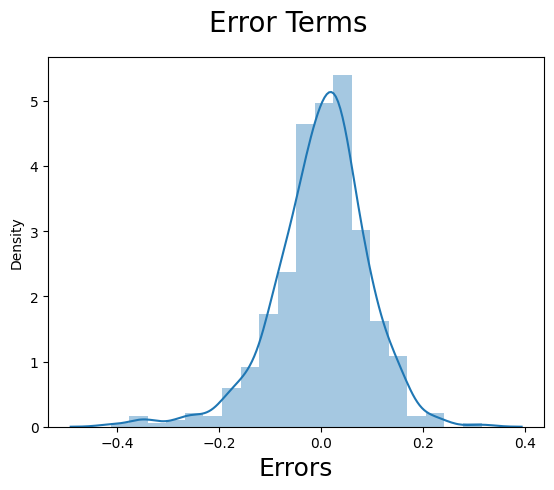

In [36]:
#plot error terms and see its distribution
fig = plt.figure()
sb.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

Above histogram shows that the error terms are following a normal distribution

### Model Prediction

In [37]:
#Calculate R squared between train & train predicted data set
r2_score(y_train, y_train_pred)

0.8352749595695671

In [38]:
#scale the test data (previously we had scaled only train data set)
bk_test[sc_vars] = scaler.fit_transform(bk_test[sc_vars])
y_test = bk_test.pop('cnt')
X_test = bk_test

In [41]:
#Predict test data values
col_sm = sm.add_constant(X_test[mCols])
lm = sm.OLS(y_test,col_sm).fit()
y_test_pred = lm.predict(col_sm)

In [42]:
#Calculate R squared between test & test predicted data set
r2_score(y_test,y_test_pred)

0.807480138974357

Train dataset and Test data set R-squared values are almost same.

In [43]:
round(lm.params,4)

const                     0.0226
yr                        0.2573
workingday                0.0350
temp                      0.5761
windspeed                -0.0304
season_Summer             0.0906
season_Winter             0.1692
mnth_Sept                 0.0792
weekday_Sat               0.0590
weathersit_LightShower   -0.2649
weathersit_Misty         -0.0801
dtype: float64

Equation for best fit line is

cnt = 0.0226 + (0.2573 * yr) + (0.0350 * working day) + (0.5761*temp) - (0.0304 * windspeed) + (0.0906 * summer_season) + (0.1692 * season_Winter) + (0.0792 * mnth_Sept) + (0.0590 * weekday_Sat) - (0.2649 * weathersit_LightShower) - (0.0801 * weathersit_Misty)

#### Boom Bike's bike demand depend on temp, working day, windspeed, year, saturday, summer, misty weather, winter, sep month & light shower weather.